# Question 1: This plot shows the yearly population change (raw value) per continent over the past 60 years.

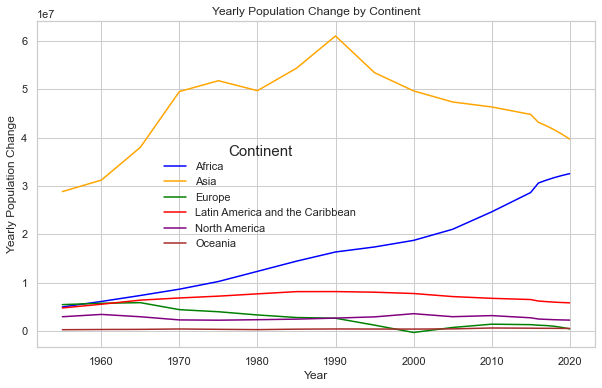

In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read population data from CSV file
df = pd.read_csv('population.csv')

# Group data by continent and year
df = df.groupby(['Continent', 'Year'])['YearlyChange'].sum().reset_index()

# Specify ordering of continents and colors
order = ['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean', 'North America', 'Oceania']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Create line plot using Seaborn's lineplot() function
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='YearlyChange', hue='Continent', hue_order=order, palette=colors, ax=ax)

# Center legend and remove border
ax.legend(loc='upper center', bbox_to_anchor=(0.4, 0.6), ncol=1, frameon=False)

# Add axis labels and plot title
ax.set_xlabel('Year')
ax.set_ylabel('Yearly Population Change')
ax.set_title('Yearly Population Change by Continent')

# Add text to plot
plt.text(0.4, 0.6, 'Continent', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)

# Display the plot
plt.show()


# Question 2: This plot shows the average height of male and female Olympians over the history of the Summer Olympics.

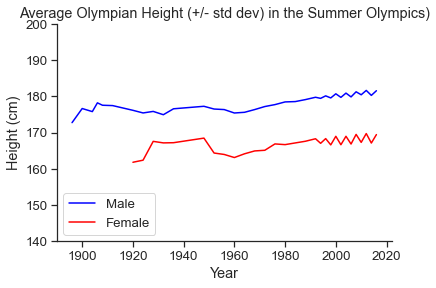

In [235]:
df = pd.read_csv("olympic_athletes.csv")
subset = df.dropna(subset=['Height'])
means = subset.groupby(['Year', 'Sex'])['Height'].mean().unstack()
stds = subset.groupby(['Year', 'Sex'])['Height'].std().unstack()

sns.lineplot(x=means.index, y="M", data=means, color='blue', label='Male', ci="sd")
sns.lineplot(x=means.index, y="F", data=means, color='red', label='Female', ci="sd")

sns.set(style="ticks", font_scale=1.2)
sns.despine()
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.title('Average Olympian Height (+/- std dev) in the Summer Olympics)')
plt.legend(loc='lower left')
plt.ylim(140, 200)
plt.show()


# Question 3: plot showing the total number of video game consoles sold bymNintendo, Microsoft and Sony. The inner ring shows the total number of consoles sold permcompany, and the outer ring refines each company into their individual consoles

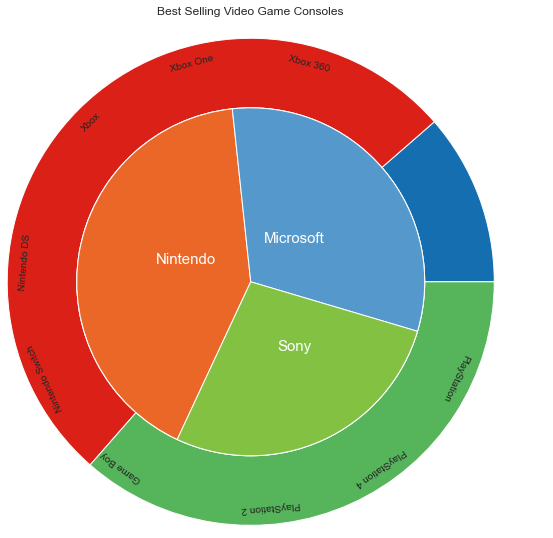

In [231]:
import numpy as np

# Load the dataset
data = pd.read_csv('game_consoles.csv')

# Calculate the total number of consoles sold by each company
total_sales = data.groupby('Company')['Units_sold'].sum()

# Define the colours
inner_colors = ['#156EAF', '#DB2018', '#56B45B']
outer_colors = ['#EA6727', '#5599CC', '#83C143']

# Create the figure and axis
fig, ax = plt.subplots()

# Inner ring: total sales per company
inner_radius = 2.8
ax.pie(total_sales, colors=inner_colors, radius=inner_radius, wedgeprops=dict(edgecolor='white'), labels=total_sales.index, textprops=dict(color='white'))

# Outer ring: sales per console
outer_radius = 2.0
for i, company in enumerate(total_sales.index):
    company_data = data[data['Company'] == company].sort_values(by='Units_sold', ascending=False).iloc[:3]
    ax.pie(company_data['Units_sold'], radius=outer_radius, startangle=45+100*i, counterclock=False, colors=outer_colors,
           wedgeprops=dict(edgecolor='white'), labels=None)
    angle = 45 + 100 * i
    for j, console in enumerate(company_data['Console']):
        angle += 30
        x = outer_radius * 1.3 * np.cos(np.deg2rad(angle))
        y = outer_radius * 1.3 * np.sin(np.deg2rad(angle))
        plt.text(x, y, console, ha='center', va='center', rotation=angle - 90, fontsize=10)

# Set the title and axis labels
ax.set_title('Best Selling Video Game Consoles',y=1.7)
#########
plt.text(0.2, 0.6, 'Nintendo', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15,color='white')
plt.text(0.7, 0.7, 'Microsoft', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15,color='white')
plt.text(0.7, 0.2, 'Sony', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15,color='white')
# Show the plot
plt.show()


# Question 4: plot showing the total number of video game consoles sold by Nintendo, Microsoft and Sony. The inner ring shows the total number of consoles sold per company, and the outer ring refines each company into their individual consoles.

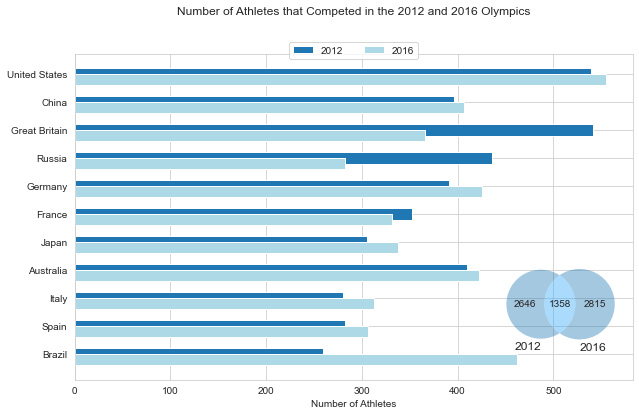

In [96]:
#importing lib for venn diagram

from matplotlib_venn import venn2

# Create the dataset
data = {'Country': ['United States', 'China', 'Great Britain', 'Russia', 'Germany',
                    'France', 'Japan', 'Australia', 'Italy', 'Spain', 'Brazil'],
        '2012': [539, 396, 541, 436, 391, 352, 305, 410, 280, 282, 259],
        '2016': [555, 407, 366, 282, 425, 331, 338, 422, 313, 306, 462]}

df = pd.DataFrame(data)

# Reverse the order of the dataframe
df = df.iloc[::-1]

# Set the figure size and background color
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart for 2012
ax.barh(y=df['Country'], width=df['2012'], color='tab:blue', height=0.4, label='2012')

# Create the bar chart for 2016
ax.barh(y=df['Country'], width=df['2016'], color=(0.678, 0.847, 0.902, 1.0), height=-0.4, align='edge', label='2016')

# Set the legend for the two bars
ax.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.05))

# Add the title and labels for the axes
ax.set_title('Number of Athletes that Competed in the 2012 and 2016 Olympics', y=1.1)
ax.set_xlabel('Number of Athletes')

# Add the Venn diagram legend
ax_venn = fig.add_axes([0.7, 0.2, 0.2, 0.2])
venn2(subsets=(2646, 2815, 1358), set_colors=('tab:blue', 'tab:blue'), set_labels=('2012', '2016'), ax=ax_venn)

# Show the plot
plt.show()
